In [288]:
##Housing Propery Assignment
##Problem Statement
#The US based company wants to enter into Australian housing market.
# They want to buy the house at low prices which would be below to the actual price.
# And want to sell them at heigher price.They want to understand the how price varies with other house variable to decide and concentrate
# on the houses which yields high returns to them. 
# Also they want to use this model to understand the dynamics of new market.
# 
## The solution can be divided into the following steps
## Data understanding and exploration
## Data Visulization
## Data Preparation
## Data Modelling and evaluation            

In [289]:
##Data Exploration and understanding 
#Understand the data attributes like names, type etc

In [411]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
Lasso(normalize=True, tol=1e-2)
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

from sklearn.feature_selection import RFE
#import stat model for quick checks
import statsmodels.api as sm

pd.options.display.max_seq_items=2000

import warnings
warnings.filterwarnings('ignore')

In [291]:
#Load the data into dataset
house_set = pd.read_csv("train.csv")
#head
house_set.head()



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [292]:
#Get the number of rows and columns in the house data set
house_set.shape

(1460, 81)

In [293]:
#List all the columns in the house dataset
list(house_set.columns)

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

In [294]:
#List the names of columns in the house dataset
list(house_set.columns)

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

In [295]:
#Describe the house dataset
house_set.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [296]:
#Display the summary of the dataset
house_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [297]:
#Check for null values
house_set.isnull

<bound method DataFrame.isnull of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour 

In [298]:
#count total null values 
house_set.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [299]:
#Check the null values column wise thoguh there are no null values in the dataset
house_set.isnull().sum(axis=1)

0       5
1       4
2       4
3       4
4       4
       ..
1455    4
1456    3
1457    2
1458    5
1459    5
Length: 1460, dtype: int64

In [300]:
#Check the null values row wise thoguh there are no null values in the dataset
house_set.isnull().sum(axis=0)

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [301]:
#index
house_set.index

RangeIndex(start=0, stop=1460, step=1)

In [302]:
#Check the percentage of null to take decisions
round(100*((house_set.isnull().sum())/len(house_set.index)),2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
                 ...  
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleCondition     0.00
SalePrice         0.00
Length: 81, dtype: float64

In [303]:
#check for the outlier in the numerical columns
house_set.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
90%,1314.100000,120.000000,96.000000,14381.700000,8.000000,7.000000,2006.000000,2006.000000,335.000000,1065.500000,...,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2010.000000,278000.000000
95%,1387.050000,160.000000,107.000000,17401.150000,8.000000,8.000000,2007.000000,2007.000000,456.000000,1274.000000,...,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,11.000000,2010.000000,326100.000000
99%,1445.410000,190.000000,141.000000,37567.640000,10.000000,9.000000,2009.000000,2009.000000,791.920000,1572.410000,...,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,12.000000,2010.000000,442567.010000


In [304]:
#checking duplicates
sum(house_set.duplicated(subset = 'Id')) == 0

True

In [305]:
#Check the percentage of null to take decisions
round(100*((house_set.isnull().sum())/len(house_set.index)),2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
                 ...  
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleCondition     0.00
SalePrice         0.00
Length: 81, dtype: float64

In [306]:
#check for outlier
house_set.describe(percentiles=[0.25,0.5,0.75,0.90,0.95,1])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
90%,1314.100000,120.000000,96.000000,14381.700000,8.000000,7.000000,2006.000000,2006.000000,335.000000,1065.500000,...,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2010.000000,278000.000000
95%,1387.050000,160.000000,107.000000,17401.150000,8.000000,8.000000,2007.000000,2007.000000,456.000000,1274.000000,...,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,11.000000,2010.000000,326100.000000
100%,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [307]:
##Find all nul values
#Get the count of null values
house_set.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [308]:
# Let us group all columns with high nulls 
house_set.columns[house_set.isnull().any()] 

nullcols = house_set.isnull().sum()/len(house_set)*100
nullcols = nullcols[nullcols>0]
nullcols.sort_values(inplace=True, ascending=False)
nullcols

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

In [309]:
#PoolQC- Pool quality - NA-No Pool
#MiscFeature: Miscellaneous feature not covered in other categories - NA - No miscellaneious feature covered
#Alley: Type of alley access to property - NA - No Alley access 
#Fence: Fence quality - NA - No fences 
#FireplaceQu: Fireplace quality - NA - No Fire place
#LotFrontage: Linear feet of street connected to property
#GarageType: Garage location - NA - No garage location
#GarageYrBlt: Year garage was built - NA - No Garage
#GarageFinish: Interior finish of the garage - NA -No garage
#GarageQual: Garage quality - NA - No garage
#GarageCond: Garage condition - NA - No garage
#BsmtExposure: Refers to walkout or garden level walls - NA - No basement
#BsmtFinType2: Rating of basement finished area (if multiple types) - NA - No basement
#BsmtFinType1: Rating of basement finished area - NA - No basement
#BsmtCond: Evaluates the general condition of the basement - NA - No basement
#BsmtQual: Evaluates the height of the basement-NA - No basement
#MasVnrArea: Masonry veneer area in square feet
#MasVnrType: Masonry veneer type
#Electrical: Electrical system

##Absence of these facility would impact the price but as per the given data set ,it indicates that NA can be concluded as absence of facility
#So need to impute the right value which would give right meaning 
#For categorical variables let us impute with value XXXX
#For numerical variables let us impute with value median 

In [310]:
## Let us understand few variables in details like 
#LotFrontage - 

house_set['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [311]:
#LotFrontage - Linear feet of street connected to property and is numeric ..so let us impute median value
house_set['LotFrontage'] = house_set.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [312]:
## Let us understand few variables in details like 
#MasVnrArea - again its numeric value ..so let us impute median value
#MasVnrType
#Electrical
house_set['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [313]:
## Let us understand few variables in details like 
#MasVnrArea - again its numeric value ..so let us impute median value
house_set['MasVnrArea'].fillna(house_set['MasVnrArea'].median(),inplace=True)

In [314]:
## Let us understand few variables in details like 
#LotFrontage
#MasVnrArea
#MasVnrType
#Electrical
house_set['MasVnrType'].describe()

count     1452
unique       4
top       None
freq       864
Name: MasVnrType, dtype: object

In [315]:
## Let us understand few variables in details like 
#MasVnrType - drop this rows having null value
#Electrical
house_set['MasVnrType'].dropna(inplace=True)

In [316]:
## Let us understand few variables in details like 
#LotFrontage
#MasVnrArea
#MasVnrType
#Electrical
house_set['Electrical'].describe()

count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object

In [317]:
## Let us understand few variables in details like 
#Electrical - drop this rows having null value
house_set['Electrical'].dropna(inplace=True)

In [318]:
house_set['Electrical'].describe()

count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object

In [319]:
#Let us look into categorical values and impute with value XXXX
null_columns = ["Alley", "MasVnrType", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]
for i in null_columns:
    house_set[i].fillna("XXXX", inplace=True)

In [320]:
# Again check for null values 

house_set.columns[house_set.isnull().any()] 

null_values = house_set.isnull().sum()/len(house_set)*100
null_values = null_values[null_values>0]
null_values.sort_values(inplace=True, ascending=False)
null_values

GarageYrBlt    5.547945
Electrical     0.068493
dtype: float64

In [321]:
#Impute GarageYrBlt columns null value with median as its numerical variable
house_set['GarageYrBlt'].fillna(house_set['GarageYrBlt'].median(),inplace=True)

In [322]:
# Again check for null values 

house_set.columns[house_set.isnull().any()] 

null_values1 = house_set.isnull().sum()/len(house_set)*100
null_values1 = null_values1[null_values1>0]
null_values1.sort_values(inplace=True, ascending=False)
null_values1

Electrical    0.068493
dtype: float64

In [323]:
house_set.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,XXXX,Reg,Lvl,AllPub,...,0,XXXX,XXXX,XXXX,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,XXXX,Reg,Lvl,AllPub,...,0,XXXX,XXXX,XXXX,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,XXXX,IR1,Lvl,AllPub,...,0,XXXX,XXXX,XXXX,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,XXXX,IR1,Lvl,AllPub,...,0,XXXX,XXXX,XXXX,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,XXXX,IR1,Lvl,AllPub,...,0,XXXX,XXXX,XXXX,0,12,2008,WD,Normal,250000


In [324]:
#drop Id column as its not usefull 
house_set = house_set.drop(['Id'],axis=1)
house_set.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,XXXX,Reg,Lvl,AllPub,Inside,...,0,XXXX,XXXX,XXXX,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,XXXX,Reg,Lvl,AllPub,FR2,...,0,XXXX,XXXX,XXXX,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,XXXX,IR1,Lvl,AllPub,Inside,...,0,XXXX,XXXX,XXXX,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,XXXX,IR1,Lvl,AllPub,Corner,...,0,XXXX,XXXX,XXXX,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,XXXX,IR1,Lvl,AllPub,FR2,...,0,XXXX,XXXX,XXXX,0,12,2008,WD,Normal,250000


c:\LEKHANA\Nataraj\AIML\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

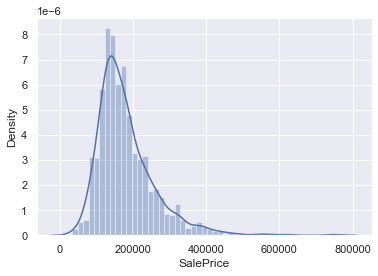

In [325]:
# Data Visualization 
#Let us understand the data now
#Understand the distrubution of various numeric variables
#This is 1st place to catch if there is strong multicollinearity going on
#Here's where you'll also identify if some predictors directly have a strong association with the outcome variable
sns.distplot(house_set['SalePrice'])

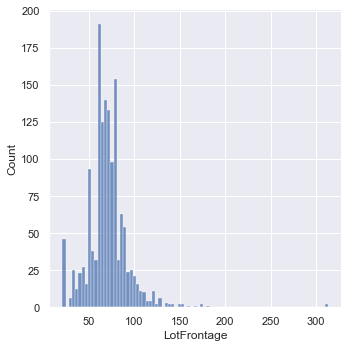

In [326]:
sns.displot(house_set['LotFrontage'])

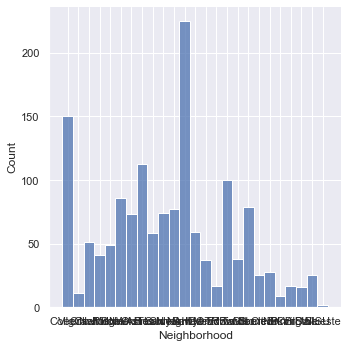

In [327]:
#Let us plot graph with sales price with Neighborhood
sns.displot(house_set['Neighborhood'])



Text(0.5, 1.0, 'Neighbour Vs Sales Price')

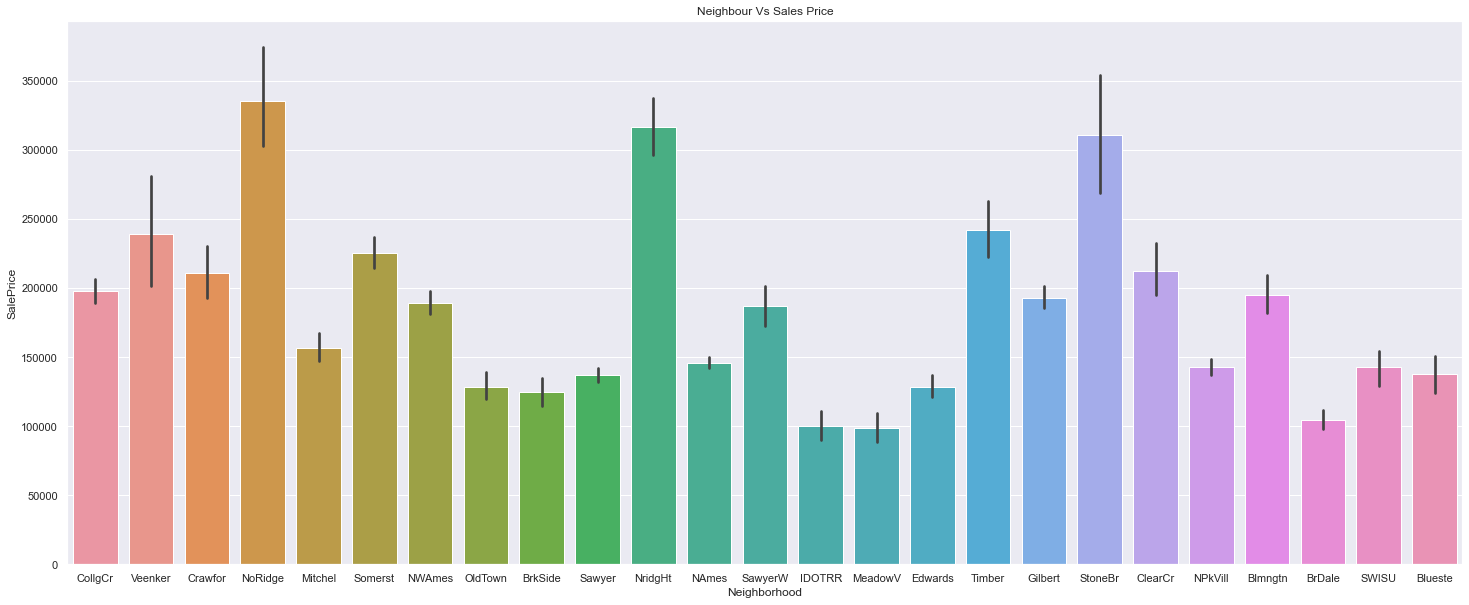

In [328]:
#plot graph Neighborhood Vs sale price
plt.figure(figsize=(25,10))
sns.barplot(x="Neighborhood",y="SalePrice",data=house_set)
plt.title("Neighbour Vs Sales Price")


Text(0.5, 1.0, 'Building Type Vs Sales Price')

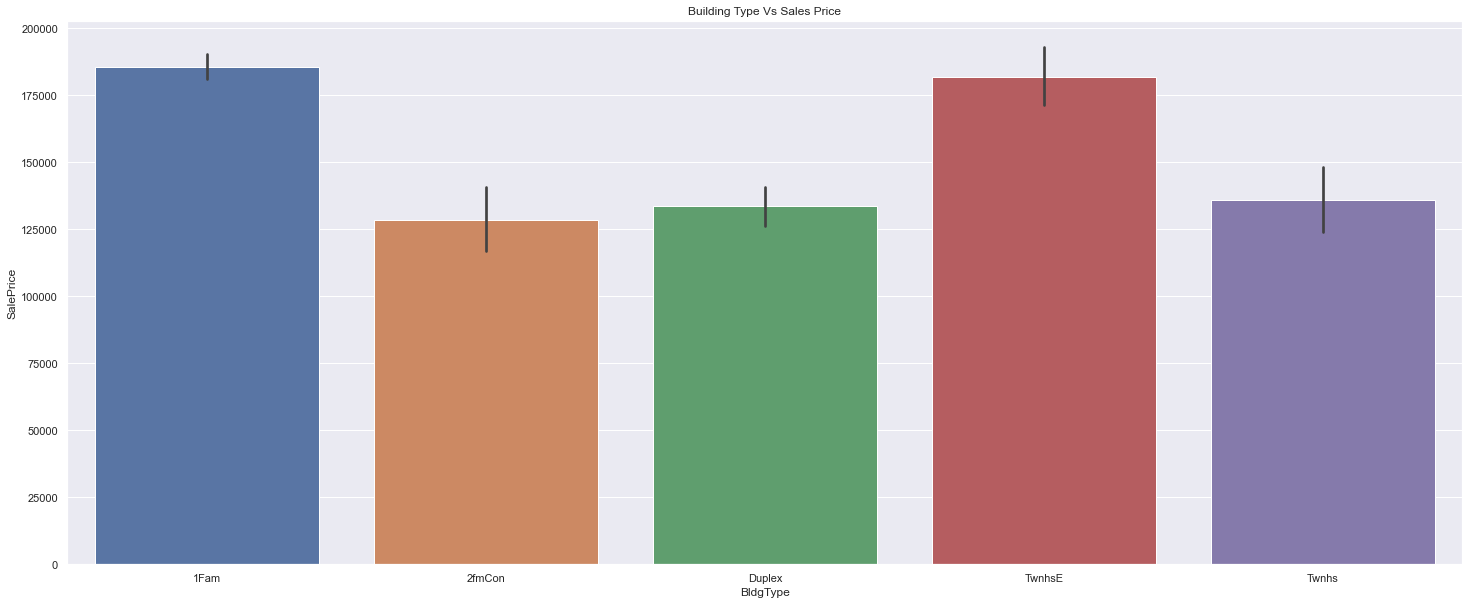

In [329]:
#plot graph BldgType Vs sale price
plt.figure(figsize=(25,10))
sns.barplot(x="BldgType",y="SalePrice",data=house_set)
plt.title("Building Type Vs Sales Price")

Text(0.5, 1.0, 'Utilities  Vs Sales Price')

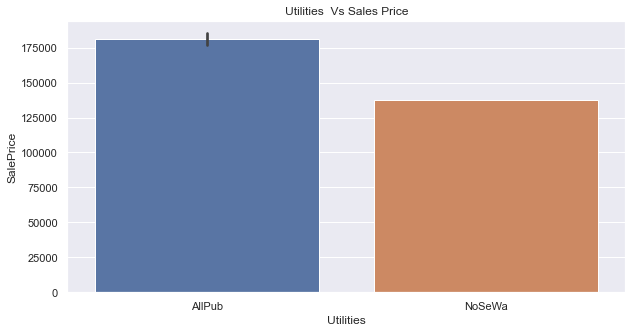

In [330]:
#plot graph Utilities Vs sale price
plt.figure(figsize=(10,5))
sns.barplot(x="Utilities",y="SalePrice",data=house_set)
plt.title("Utilities  Vs Sales Price")

Text(0.5, 1.0, 'Condition1  Vs Sales Price')

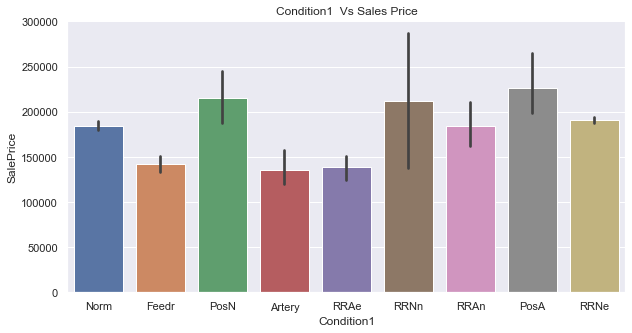

In [331]:
#Condition1
#plot graph Condition1 Vs sale price
plt.figure(figsize=(10,5))
sns.barplot(x="Condition1",y="SalePrice",data=house_set)
plt.title("Condition1  Vs Sales Price")

Text(0.5, 1.0, 'Over all condition  Vs Sales Price')

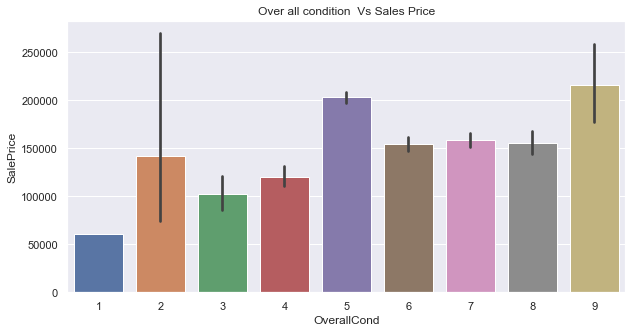

In [332]:
#check sales price for over all Condition
#plot graph over all Condition Vs sale price
plt.figure(figsize=(10,5))
sns.barplot(x="OverallCond",y="SalePrice",data=house_set)
plt.title("Over all condition  Vs Sales Price")

In [333]:
#From the aboe graph its evident that there is sligh increase in the sale price for over all good condition house

Text(0.5, 1.0, 'Over all quality  Vs Sales Price')

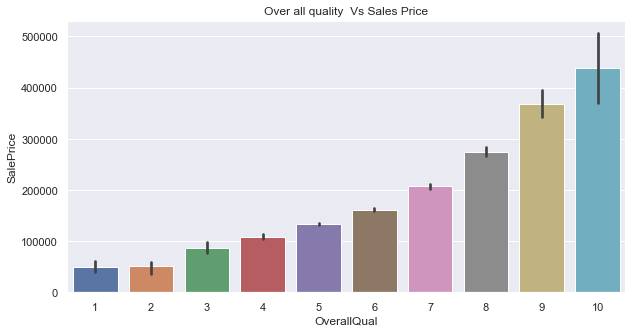

In [334]:
#check sales price for over all quality
#plot graph over over all quality Vs sale price
plt.figure(figsize=(10,5))
sns.barplot(x="OverallQual",y="SalePrice",data=house_set)
plt.title("Over all quality  Vs Sales Price")

In [335]:
#From the above graph we can conclude that sale price is high for good quality house

Text(0.5, 1.0, 'Over all quality  Vs Sales Price')

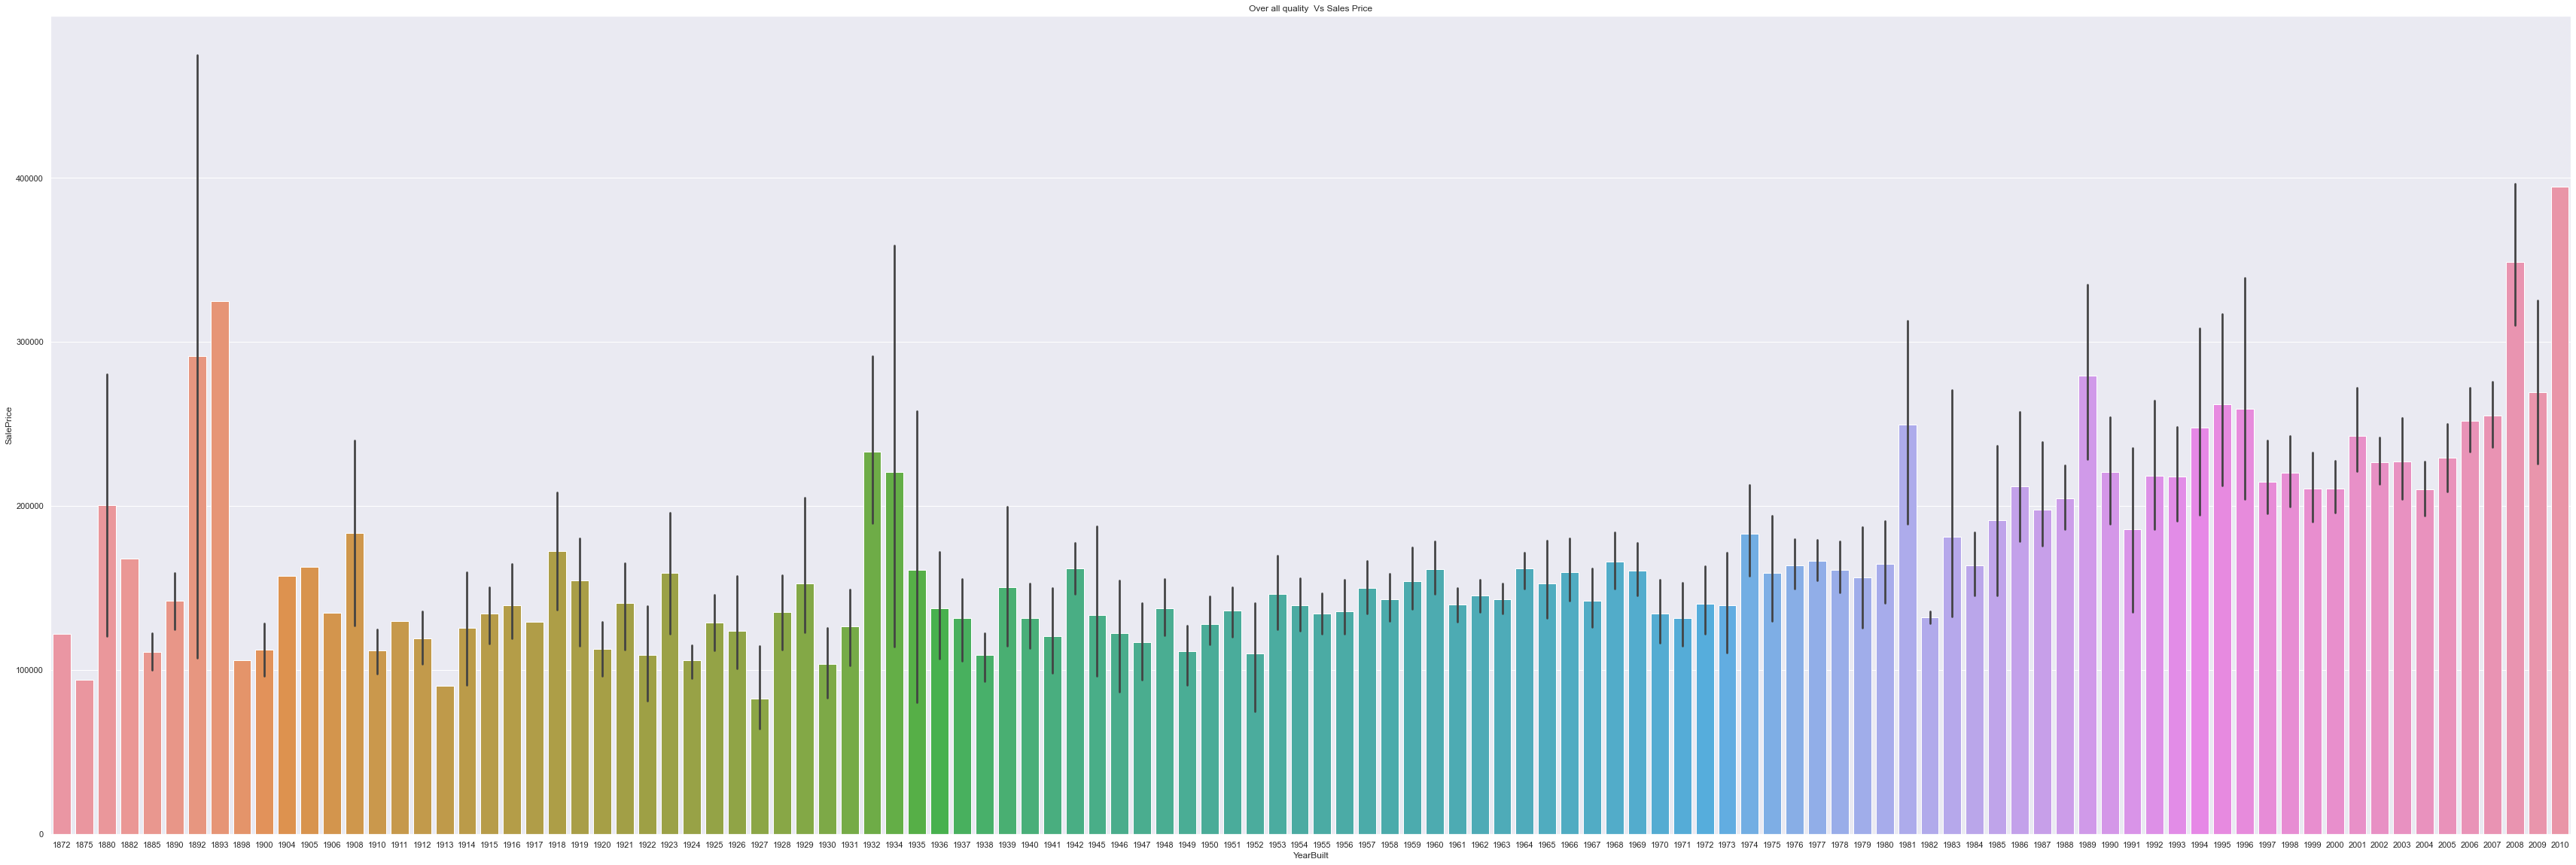

In [336]:
#check sales price for year built
#plot graph over year built Vs sale price
#From the graph its clear that older the property sales price is low 
plt.figure(figsize=(60,20))
sns.barplot(x="YearBuilt",y="SalePrice",data=house_set)
plt.title("Over all quality  Vs Sales Price")


Text(0.5, 1.0, 'Sold  Vs Sales Price')

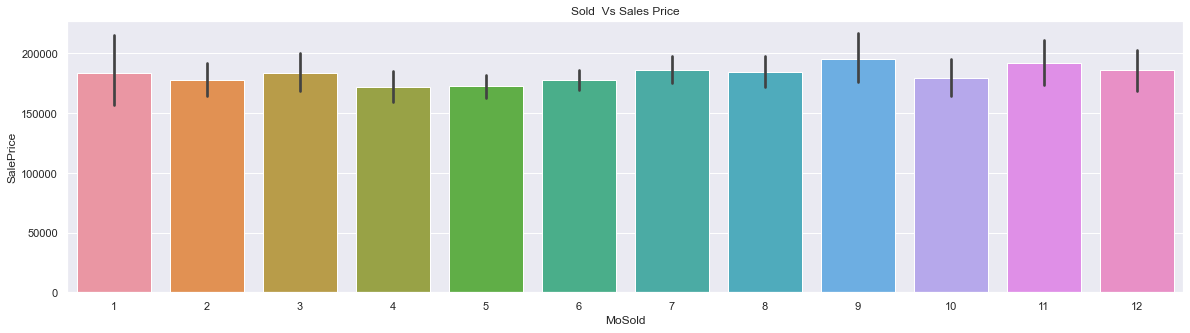

In [337]:
#Looks like this variable is almost constant ..so can be dropped 
plt.figure(figsize=(20,5))
sns.barplot(x="MoSold",y="SalePrice",data=house_set)
plt.title("Sold  Vs Sales Price")

Text(0.5, 1.0, 'year Sold  Vs Sales Price')

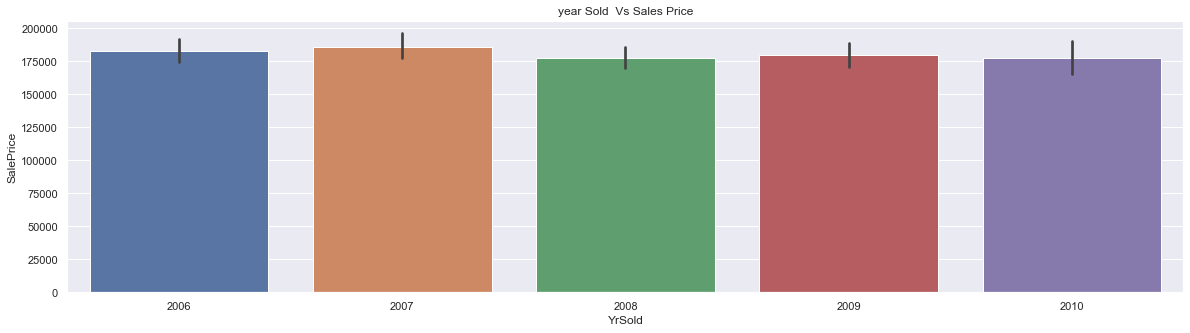

In [338]:
#Looks like this variable is almost constant ..so can be dropped 
plt.figure(figsize=(20,5))
sns.barplot(x="YrSold",y="SalePrice",data=house_set)
plt.title("year Sold  Vs Sales Price")

Text(0.5, 1.0, 'year built  Vs Sales Price')

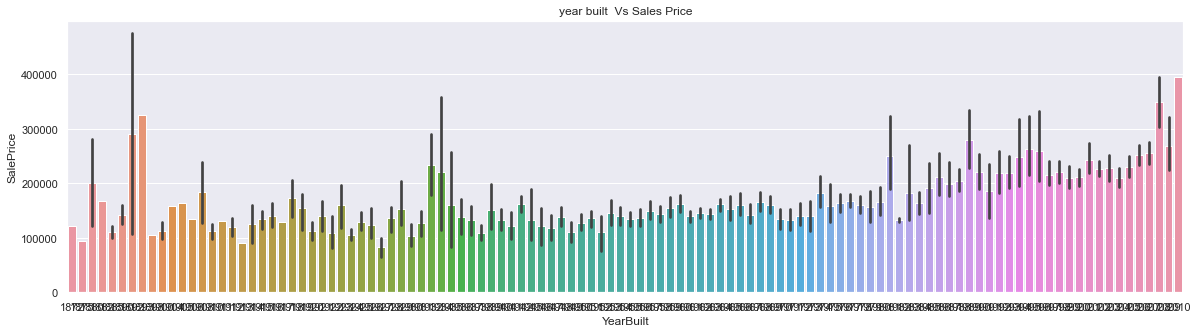

In [339]:
#Looks like this variable is almost constant ..so can be dropped 
plt.figure(figsize=(20,5))
sns.barplot(x="YearBuilt",y="SalePrice",data=house_set)
plt.title("year built  Vs Sales Price")

In [340]:
# All numeric variables in the dataset
house_set.info()
numeric_df = house_set.select_dtypes(include=['float64','int64'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [341]:
#get corelation matrix
cor_matrix = numeric_df.corr()
cor_matrix

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.370367,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.370367,1.000000,0.335957,0.239546,-0.043595,0.120999,0.084550,0.195830,0.232576,0.052237,...,0.088736,0.141734,0.008057,0.064654,0.041063,0.174567,0.005332,0.007370,0.004756,0.349876
LotArea,-0.139781,0.335957,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.239546,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.043595,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.120999,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.084550,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.023573,0.195830,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,-0.071330,...,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,-0.008317,0.472614
BsmtFinSF1,-0.069836,0.232576,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.052237,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.071330,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


In [342]:
# Pairwise scatter plot..visualise the numerical variables#
#sns.pairplot(numeric_df)
#plt.show()

In [343]:
# Let us group all columns with high nulls 
house_set.columns[house_set.isnull().any()] 

nullcols = house_set.isnull().sum()/len(house_set)*100
nullcols = nullcols[nullcols>0]
nullcols.sort_values(inplace=True, ascending=False)
nullcols

Electrical    0.068493
dtype: float64

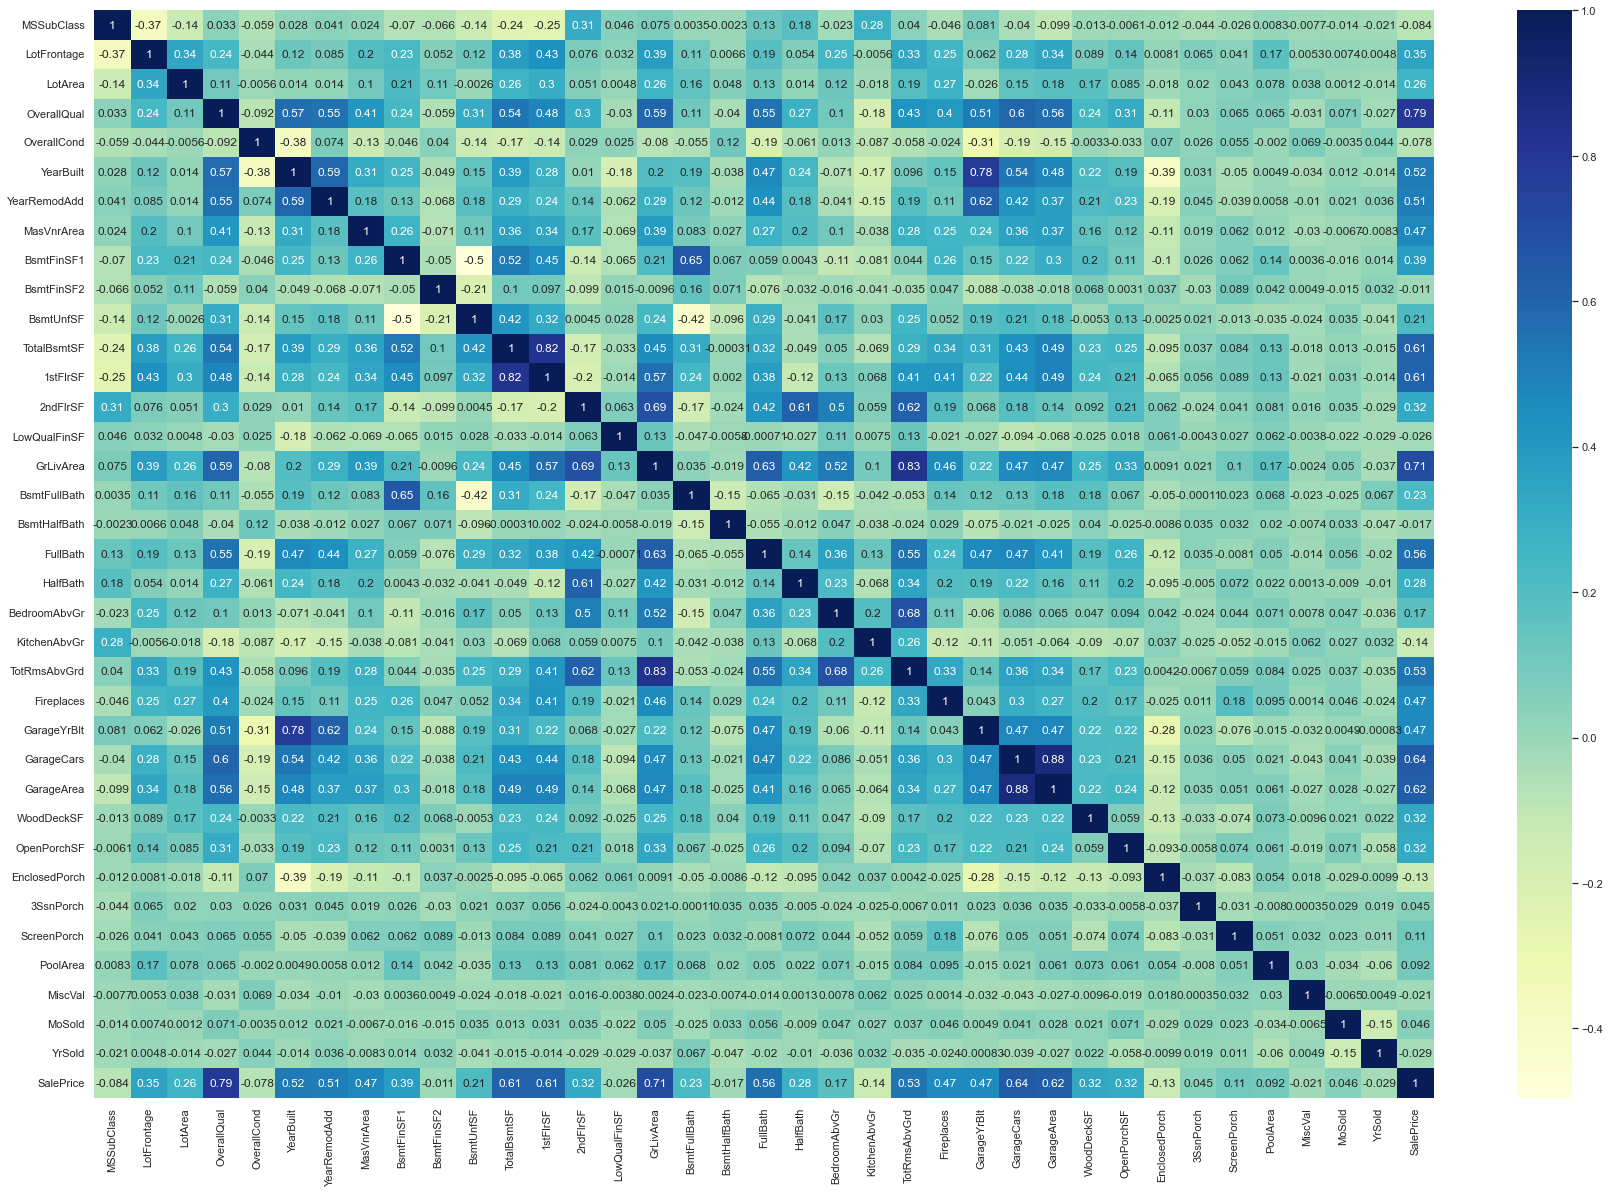

In [344]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(30,20))

# heatmap
sns.heatmap(cor_matrix, cmap="YlGnBu", annot=True)
plt.show()

c:\LEKHANA\Nataraj\AIML\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


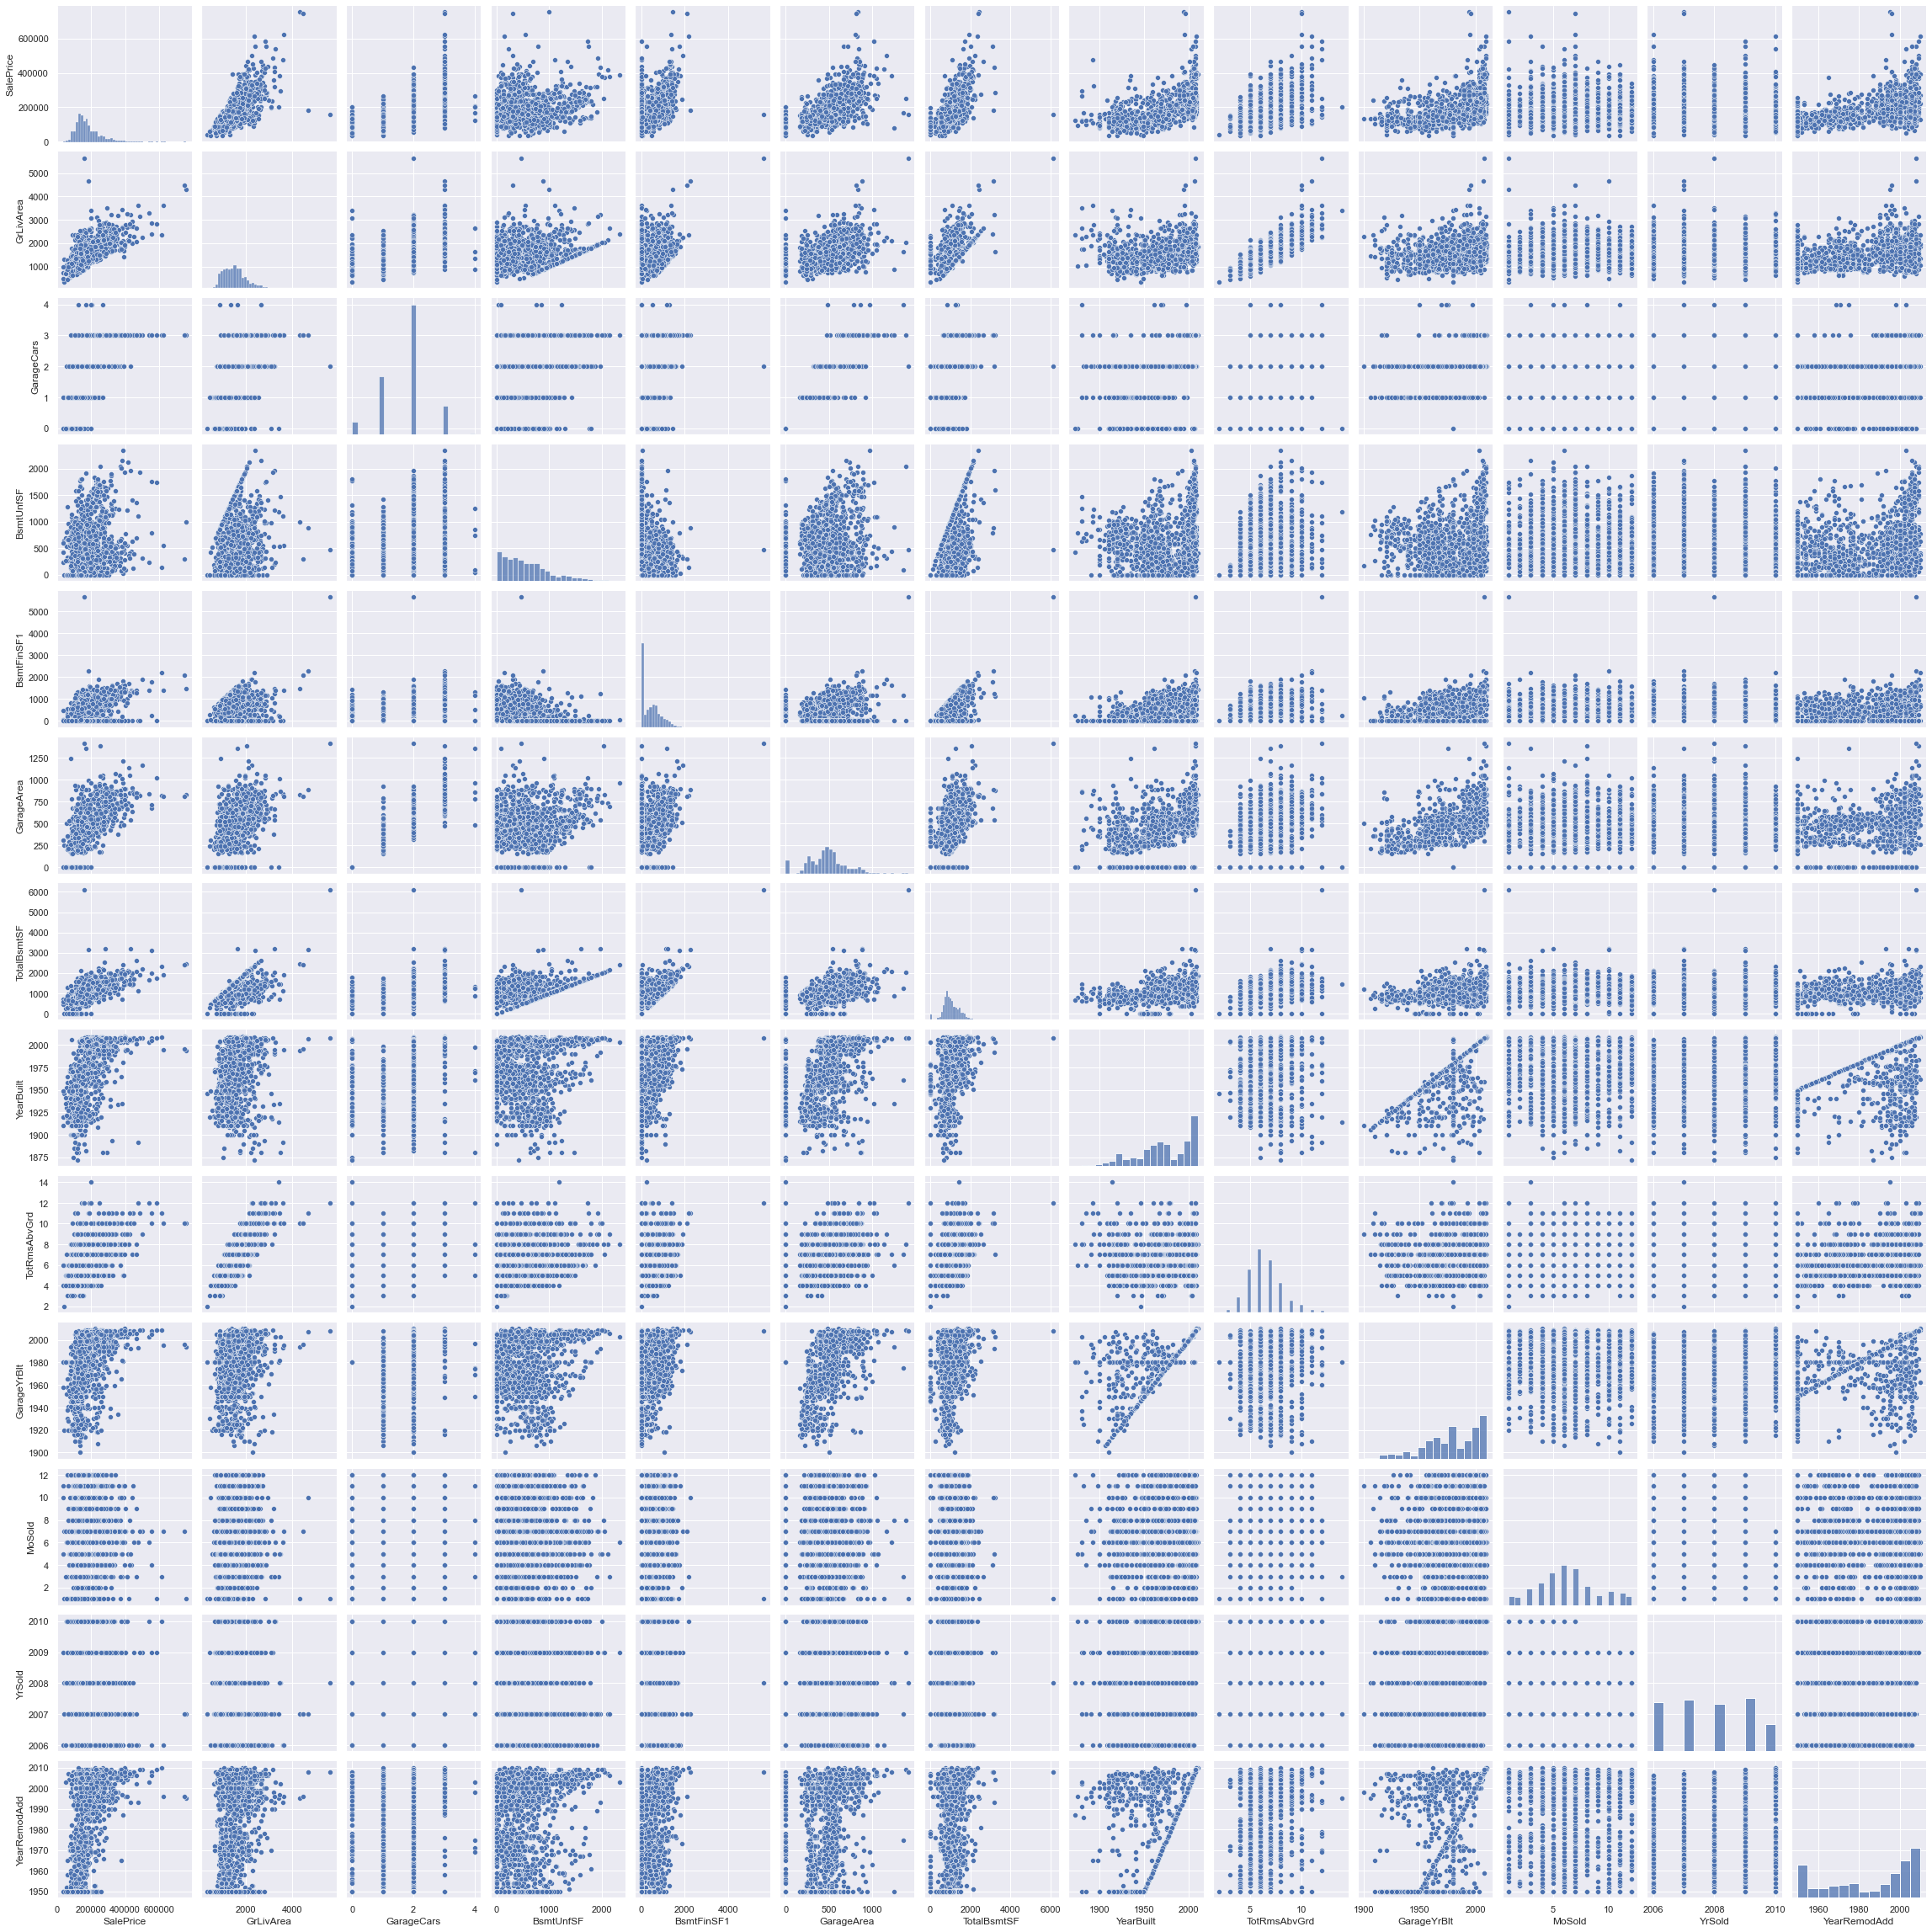

In [345]:
#From the above heat map, we can notice few fo the variables like saleprice,GarageCars,GarageArea etc are highly corelated.
# Checking the same with a pairplot 
sns.set()
cols = ['SalePrice', 'GrLivArea', 'GarageCars', 'BsmtUnfSF', 'BsmtFinSF1', 'GarageArea', 'TotalBsmtSF', 'YearBuilt', 'TotRmsAbvGrd', 'GarageYrBlt','MoSold','YrSold','YearRemodAdd']
sns.pairplot(house_set[cols], size = 2.5)
plt.show()

In [346]:
#Now let us drop the columsn that are higly corelated and impacting the salesprice
house_set = house_set.drop(['GarageCars'], axis = 1)
house_set = house_set.drop(['BsmtUnfSF'], axis = 1)
dathouse_seta = house_set.drop(['TotRmsAbvGrd'], axis = 1)
house_set = house_set.drop(['GarageYrBlt'], axis = 1)    
house_set = house_set.drop(['MoSold'], axis = 1)  
house_set = house_set.drop(['YrSold'], axis = 1)    
house_set = house_set.drop(['YearBuilt'], axis = 1)
house_set = house_set.drop(['YearRemodAdd'], axis = 1)
house_set = house_set.drop(['Street'], axis = 1)
house_set = house_set.drop(['Utilities'], axis = 1)
house_set.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,XXXX,Reg,Lvl,Inside,Gtl,CollgCr,...,0,0,0,XXXX,XXXX,XXXX,0,WD,Normal,208500
1,20,RL,80.0,9600,XXXX,Reg,Lvl,FR2,Gtl,Veenker,...,0,0,0,XXXX,XXXX,XXXX,0,WD,Normal,181500
2,60,RL,68.0,11250,XXXX,IR1,Lvl,Inside,Gtl,CollgCr,...,0,0,0,XXXX,XXXX,XXXX,0,WD,Normal,223500
3,70,RL,60.0,9550,XXXX,IR1,Lvl,Corner,Gtl,Crawfor,...,0,0,0,XXXX,XXXX,XXXX,0,WD,Abnorml,140000
4,60,RL,84.0,14260,XXXX,IR1,Lvl,FR2,Gtl,NoRidge,...,0,0,0,XXXX,XXXX,XXXX,0,WD,Normal,250000


In [347]:
#Also below variables are having low variance ..hence droping these column variables
house_set = house_set.drop(['PoolQC','MiscVal', 'Alley', 'RoofMatl', 'Condition2', 'Heating', 'GarageCond', 'Fence', 'Functional' ], axis = 1)
house_set.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscFeature,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,...,0,61,0,0,0,0,XXXX,WD,Normal,208500
1,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,...,298,0,0,0,0,0,XXXX,WD,Normal,181500
2,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,...,0,42,0,0,0,0,XXXX,WD,Normal,223500
3,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,...,0,35,272,0,0,0,XXXX,WD,Abnorml,140000
4,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,...,192,84,0,0,0,0,XXXX,WD,Normal,250000


In [348]:
house_set.shape

(1460, 62)

In [349]:
##Data Preparation 
house_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 62 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   LotShape       1460 non-null   object 
 5   LandContour    1460 non-null   object 
 6   LotConfig      1460 non-null   object 
 7   LandSlope      1460 non-null   object 
 8   Neighborhood   1460 non-null   object 
 9   Condition1     1460 non-null   object 
 10  BldgType       1460 non-null   object 
 11  HouseStyle     1460 non-null   object 
 12  OverallQual    1460 non-null   int64  
 13  OverallCond    1460 non-null   int64  
 14  RoofStyle      1460 non-null   object 
 15  Exterior1st    1460 non-null   object 
 16  Exterior2nd    1460 non-null   object 
 17  MasVnrType     1460 non-null   object 
 18  MasVnrAr

In [350]:
#type of each feature in data: int, float, object
types = house_set.dtypes
#numerical values are either type int or float
numeric_type = types[(types == 'int64') | (types == float)] 
#categorical values are type object
categorical_type = types[types == object]

pd.DataFrame(types).reset_index().set_index(0).reset_index()[0].value_counts()

object     33
int64      27
float64     2
Name: 0, dtype: int64

In [351]:
#Let us convert numeric and categorical to list
numerical_columns_list = list(numeric_type.index)
print(numerical_columns_list)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'SalePrice']


In [352]:
categorical_type_list = list(categorical_type.index)
print(categorical_type_list)


['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'PavedDrive', 'MiscFeature', 'SaleType', 'SaleCondition']


In [353]:
# Dummy variable:  Converent catogorical columns into integer values
# Create dummy variables  on categorical vairables categorical_type_list = list(categorical_type.index)
# Convert into dummies

house_set_dummies = pd.get_dummies(house_set,drop_first=True)
house_set_dummies.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,196.0,706,0,856,856,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,0.0,978,0,1262,1262,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,162.0,486,0,920,920,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,0.0,216,0,756,961,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,350.0,655,0,1145,1145,...,0,0,0,0,1,0,0,0,1,0


In [361]:
X = house_set_dummies.drop(['SalePrice'], axis=1)
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,196.0,706,0,856,856,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,0.0,978,0,1262,1262,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,162.0,486,0,920,920,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,0.0,216,0,756,961,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,350.0,655,0,1145,1145,...,0,0,0,0,1,0,0,0,1,0


In [362]:
Y = house_set_dummies['SalePrice']

Y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [364]:
# Now dividing into X and Y sets for the  model building
#Model building and Evaluation
#Model building and evaluation
#Splitting house  data set into train and test#
#np.random.seed(0)
X_train,X_test,y_train,y_test = train_test_split(X,Y,train_size=0.7,test_size=0.3 ,random_state=50)


In [367]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea']] = scaler.fit_transform(X_train[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea']])

X_test[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea']] = scaler.fit_transform(X_test[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea']])
X_train.head()

c:\LEKHANA\Nataraj\AIML\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
c:\LEKHANA\Nataraj\AIML\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
175,-0.870387,0.612765,0.166080,-0.059996,1.252715,-0.575015,0.085426,-0.283127,0.347365,2.572160,...,0,0,0,0,1,0,0,0,1,0
1408,0.304785,-0.432534,-0.261043,-1.501313,1.252715,-0.575015,-0.943351,-0.283127,-0.973680,-1.069794,...,0,0,0,0,1,0,0,0,1,0
1148,-0.165284,-0.432534,-0.439778,0.660663,1.252715,-0.575015,-0.943351,-0.283127,-1.087563,-1.504156,...,0,0,0,0,1,0,0,0,1,0
861,3.125199,0.220778,0.079341,-0.780655,-1.406374,-0.575015,0.870488,-0.283127,-0.023894,-0.303879,...,0,0,0,0,1,0,0,0,1,0
220,-0.870387,0.133670,-0.151525,0.660663,-0.520011,-0.575015,-0.943351,-0.283127,1.021554,0.875837,...,0,0,1,0,0,0,0,0,0,1


In [368]:
X_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
930,-0.879672,0.106932,-0.211538,1.358461,-0.509551,-0.560080,-1.009468,-0.301886,0.899165,0.771223,...,0,0,0,0,1,0,0,0,1,0
530,0.559791,0.676372,0.029981,-0.099887,-0.509551,0.597117,0.743814,-0.301886,0.887692,0.884656,...,0,0,0,0,1,0,0,0,0,0
1291,2.479076,-2.360638,-1.583933,-0.829061,1.350309,0.856033,-0.518001,-0.301886,-1.019124,-1.434127,...,0,0,0,0,1,0,0,0,1,0
1385,-0.159940,-1.459026,-0.872447,-1.558235,2.280239,-0.560080,0.634091,-0.301886,-0.638220,-0.996222,...,0,0,0,0,1,0,0,0,1,0
305,-0.879672,0.439105,0.065215,1.358461,-0.509551,0.739785,2.300508,-0.301886,2.124484,2.179903,...,0,0,0,0,1,0,0,0,1,0


In [369]:
### Building the first model with all features  


In [372]:
#Building the first model with all features
X_train_lm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

c:\LEKHANA\Nataraj\AIML\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const                    166831.835460
MSSubClass                 -960.415526
LotFrontage               -3951.066568
LotArea                    7690.553420
OverallQual               11833.743599
                             ...      
SaleCondition_AdjLand     -2483.835545
SaleCondition_Alloca      10474.118408
SaleCondition_Family       3219.676558
SaleCondition_Normal       4869.184079
SaleCondition_Partial    -24331.892574
Length: 212, dtype: float64

In [373]:
#summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     38.54
Date:                Wed, 05 Oct 2022   Prob (F-statistic):          1.71e-314
Time:                        15:15:10   Log-Likelihood:                -11791.
No. Observations:                1021   AIC:                         2.398e+04
Df Residuals:                     820   BIC:                         2.497e+04
Df Model:                         200                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.668e+

In [374]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [375]:
# Print the coefficients and intercept
print(lm.coef_)
print(lm.intercept_)   

[-1.00344050e+03 -4.00907026e+03  7.67881842e+03  1.18195802e+04
  6.26450389e+03  5.28033893e+03 -1.94627766e+03  1.95933984e+01
 -2.61973849e+02  5.40417518e+16  6.04798501e+16  6.36130852e+15
 -7.31798772e+16  4.25097523e+03  3.31922060e+02  6.55289943e+03
  2.51692788e+03 -2.56627963e+03 -3.92449156e+03  3.51217251e+03
  1.89591509e+03  4.29542628e+03  9.69520055e+02 -7.58188457e+02
  5.20591927e+01  1.52636167e+03  1.69313787e+03 -9.37652809e+02
  3.29306638e+04  2.27853689e+04  2.25748210e+04  1.92660157e+04
  1.70268230e+03 -3.22174576e+04  7.11553952e+01  1.21513596e+04
  7.96101731e+02  1.04956287e+04  7.66688067e+03 -7.05701905e+03
 -1.77199844e+04 -2.70820166e+03  4.41056628e+03 -2.96329090e+04
 -1.47856707e+04 -1.02188603e+04 -1.69938216e+04 -1.01344038e+04
 -1.35574286e+04  7.01326768e+02 -3.41158322e+04 -1.56308871e+04
 -2.62249642e+04 -1.87907501e+04 -2.60021788e+04 -2.26885454e+04
 -1.65021993e+04 -2.36458556e+04  3.60982020e+04  1.22281284e+04
 -2.46051851e+04 -2.02640

In [376]:
# getting the model summary
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     38.54
Date:                Wed, 05 Oct 2022   Prob (F-statistic):          1.71e-314
Time:                        15:16:30   Log-Likelihood:                -11791.
No. Observations:                1021   AIC:                         2.398e+04
Df Residuals:                     820   BIC:                         2.497e+04
Df Model:                         200                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.668e+05    5.9e+04      2.826      0.005    5.09e+04    2.83e+05
MSSubClass             -960.4155   4719.617     -0.203      0.839   -1.02e+04    8303.538
LotFrontage           -3951.0666   1518.472     -2.602      0.009   -6931.617    -970.516
LotArea                7690.5534   1684.075      4.567      0.000    4384.947     1.1e+04
OverallQual            1.183e+04   2122.698      5.575      0.000    7667.182     1.6e+04
OverallCond            6281.0973   1339.289      4.690      0.000    3652.259    8909.936
MasVnrArea             5326.4162   1589.311      3.351      0.001    2206.820    8446.012
BsmtFinSF1            -1952.3084   2079.005     -0.939      0.348   -6033.107    2128.490
BsmtFinSF2                8.7547   1907.193      0.005      0.996   -3734.801    3752.310
TotalBsmtSF            -266.4554   3037.723     -0.088      0.930   -6229.084    5696.173
1stFlrSF               3819.4954   2347.567      1.627      0.104    -788.452    8427.443
2ndFlrSF               1.764e+04   2526.387      6.981      0.000    1.27e+04    2.26e+04
LowQualFinSF            564.9024   1310.788      0.431      0.667   -2007.992    3137.797
GrLivArea              1.745e+04   1817.381      9.600      0.000    1.39e+04     2.1e+04
BsmtFullBath           4246.0055   1555.538      2.730      0.006    1192.700    7299.311
BsmtHalfBath            380.5608   1071.512      0.355      0.723   -1722.668    2483.789
FullBath               6541.6521   1793.122      3.648      0.000    3022.002    1.01e+04
HalfBath               2529.3643   1557.405      1.624      0.105    -527.605    5586.333
BedroomAbvGr          -2567.8419   1694.240     -1.516      0.130   -5893.399     757.716
KitchenAbvGr          -3958.9946   1777.414     -2.227      0.026   -7447.811    -470.178
TotRmsAbvGrd           3491.2855   1424.164      2.451      0.014     695.849    6286.722
Fireplaces             1862.9246   2550.936      0.730      0.465   -3144.208    6870.057
GarageArea             4274.5339   1786.857      2.392      0.017     767.183    7781.885
WoodDeckSF              988.3313   1097.673      0.900      0.368   -1166.248    3142.910
OpenPorchSF            -736.1324   1154.209     -0.638      0.524   -3001.685    1529.420
EnclosedPorch            21.0240   1155.503      0.018      0.985   -2247.069    2289.117
3SsnPorch              1513.2986    959.393      1.577      0.115    -369.858    3396.455
ScreenPorch            1663.9876    987.802      1.685      0.092    -274.930    3602.905
PoolArea               -908.6899   1185.879     -0.766      0.444   -3236.406    1419.026
MSZoning_FV            3.306e+04    2.1e+04      1.572      0.116   -8218.549    7.43e+04
MSZoning_RH            2.298e+04   2.06e+04      1.113      0.266   -1.75e+04    6.35e+04
MSZoning_RL            

###Model building using REF
#### Now we have more than 100 features and its going to take big amount of time to eliminate one by one to build right module. Hence manual elimation of features not recommended. So need to build the model using method called REF,Recursive elimination of feature.We will start with minimum 15 features and then use statsmodel library to build the model using shorted listed features.

In [377]:
RFE
#start with 15 features
lm = LinearRegression() #Object instantiation

feature_rfe = RFE(lm,n_features_to_select=100)
#fit with 20 features
feature_rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=100)

In [378]:
# Check the ranks
list(zip(X_train.columns,feature_rfe.support_,feature_rfe.ranking_))

[('MSSubClass', False, 90),
 ('LotFrontage', False, 42),
 ('LotArea', False, 28),
 ('OverallQual', True, 1),
 ('OverallCond', False, 32),
 ('MasVnrArea', False, 39),
 ('BsmtFinSF1', False, 74),
 ('BsmtFinSF2', False, 111),
 ('TotalBsmtSF', False, 104),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 51),
 ('BsmtHalfBath', False, 105),
 ('FullBath', False, 50),
 ('HalfBath', False, 73),
 ('BedroomAbvGr', False, 59),
 ('KitchenAbvGr', False, 56),
 ('TotRmsAbvGrd', False, 57),
 ('Fireplaces', False, 106),
 ('GarageArea', False, 43),
 ('WoodDeckSF', False, 91),
 ('OpenPorchSF', False, 100),
 ('EnclosedPorch', False, 108),
 ('3SsnPorch', False, 81),
 ('ScreenPorch', False, 80),
 ('PoolArea', False, 89),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotShape_IR2', False, 94),
 ('LotShape_IR3', True, 1),
 ('LotShape_Reg', False, 109),
 ('LandContour_HL

In [388]:
y_train_pred = feature_rfe.predict(X_train)
metrics.r2_score(y_true=y_train, y_pred=y_train_pred)

0.8776478027612307

In [390]:
y_test_pred = feature_rfe.predict(X_test)
metrics.r2_score(y_true=y_test, y_pred=y_test_pred)

-3.9781119085128765e+21

In [382]:
#subset of features selected by feature_ref
cols1 = X_train.columns[feature_rfe.support_]

#subsetting for 20 selected features
X_train_f100 = X_train[cols1]

#Add constant to the model
X_train_f100_rfe = pd.DataFrame(X_train[cols1])
X_train_f100_rfe.head()

,OverallQual,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR3,...,GarageType_Detchd,GarageType_XXXX,GarageFinish_XXXX,GarageQual_Fa,GarageQual_XXXX,MiscFeature_Shed,MiscFeature_XXXX,SaleType_Con,SaleType_New,SaleCondition_Partial
175,-0.059996,2.572160,-0.797551,-0.121406,1.229791,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1408,-1.501313,-1.069794,0.630928,-0.121406,-0.279140,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
1148,0.660663,-1.504156,0.440311,-0.121406,-0.757443,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
861,-0.780655,-0.303879,-0.797551,-0.121406,-0.894101,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
220,0.660663,0.875837,-0.797551,-0.121406,-0.022906,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,1


In [383]:
X_train_f100_rfe.shape

(1021, 100)

In [385]:
#fitting the model with 20 features
lm1 = sm.OLS(y_train,X_train_f100_rfe).fit()
print(lm1.summary())

                                 OLS Regression Results                                
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.978
Model:                            OLS   Adj. R-squared (uncentered):              0.976
Method:                 Least Squares   F-statistic:                              459.1
Date:                Wed, 05 Oct 2022   Prob (F-statistic):                        0.00
Time:                        15:27:39   Log-Likelihood:                         -11938.
No. Observations:                1021   AIC:                                  2.406e+04
Df Residuals:                     929   BIC:                                  2.451e+04
Df Model:                          92                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

### Lasso and Ridge Regression
##Let us predict the house price using lasso and ridge regression

##Ridge regression

In [432]:
# list of alphas to tune

params = {'alpha': np.logspace(-2, 0.001, 100)}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([0.01      , 0.0104764 , 0.0109755 , 0.01149837, 0.01204616,
       0.01262004, 0.01322126, 0.01385112, 0.01451099, 0.01520229,
       0.01592653, 0.01668527, 0.01748016, 0.01831292, 0.01918535,
       0.02009934, 0.02105688, 0.02206003, 0.02311097, 0.02421198,
       0.02536544, 0.02657385, 0.02783984, 0.02916613, 0.03055561,
       0.03201128, 0.0335363...
       0.25992526, 0.27230813, 0.28528092, 0.29887174, 0.31311002,
       0.32802662, 0.34365385, 0.36002556, 0.37717722, 0.39514599,
       0.41397079, 0.43369241, 0.45435356, 0.47599902, 0.49867567,
       0.52243264, 0.54732139, 0.57339585, 0.6007125 , 0.62933051,
       0.65931189, 0.69072159, 0.72362765, 0.75810135, 0.79421739,
       0.832054  , 0.87169316, 0.91322072, 0.95672667, 1.00230524])},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [433]:
#Results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=5]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.009416,0.001484,0.003800,0.001166,0.01,{'alpha': 0.01},-23961.897052,-20105.407075,-23015.628642,-23999.294584,...,-22892.048216,1441.344824,100,-15194.507944,-16412.707033,-15993.543630,-12718.598366,-15664.087496,-15196.688894,1301.773902
1,0.009303,0.001080,0.003603,0.000494,0.010476,{'alpha': 0.010476401189762107},-23957.630861,-20100.374588,-23011.788374,-23997.368173,...,-22887.594295,1441.810743,99,-15194.434837,-16412.371226,-15993.024494,-12718.641512,-15664.156358,-15196.525685,1301.636165
2,0.009304,0.000870,0.003603,0.000795,0.010975,{'alpha': 0.010975498188884894},-23953.176545,-20095.151974,-23007.771451,-23995.364245,...,-22882.957329,1442.290277,98,-15194.356905,-16412.023198,-15992.486086,-12718.687480,-15664.228211,-15196.356376,1301.492954
3,0.008863,0.001398,0.003802,0.000400,0.011498,{'alpha': 0.011498372228426555},-23948.526483,-20089.733945,-23003.570178,-23993.280203,...,-22878.130940,1442.783451,97,-15194.279609,-16411.662642,-15991.927889,-12718.736455,-15664.303170,-15196.181953,1301.344089
4,0.007402,0.000801,0.002902,0.000487,0.012046,{'alpha': 0.01204615604942156},-23943.672805,-20084.115205,-22999.176575,-23991.113397,...,-22873.108612,1443.290255,96,-15194.197976,-16411.316345,-15991.349384,-12718.788631,-15664.381354,-15196.006738,1301.194449


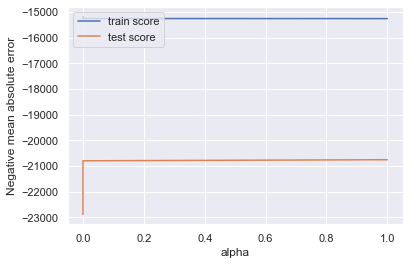

In [434]:
# Let us plot mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative mean absolute error')
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [435]:
#redge regression model coefficients
alpha = 2
rr_model = Ridge(alpha=alpha)

rr_model.fit(X_train, y_train)
rr_model.coef_

array([ -5172.02957294,  -3746.98543046,   6555.17669542,  13617.49854203,
         6457.02284496,   5308.07267229,  -1988.76797533,    621.65661613,
          934.42940446,   3911.7735177 ,  16175.509639  ,   -349.77617185,
        16226.68010986,   4403.43057053,    476.79217846,   7169.0828629 ,
         2875.40032932,  -2921.09791788,  -4020.38027289,   3634.95094056,
         1852.01566456,   4583.51317179,   1221.43979473,   -812.34846704,
         -235.77116999,   1264.72752357,   1494.17135707,   -523.34700872,
        12927.9704106 ,   3558.61139267,   5826.09378637,   1053.78914383,
         3797.50016829, -25567.68093486,   -281.86826263,  11627.42088978,
         2423.53700088,  10523.40422844,   7223.8006705 ,  -8305.24312286,
        -8605.61594776,  -2508.53537799,   3806.43101087, -20490.29163943,
        -2255.76480636,  -1722.38437598,  -1945.23528894,  -1634.26163918,
        -5175.10715261,  10713.08403761, -21908.73550466,  -8151.26491296,
       -14254.99359228,  

In [437]:
# ridge regression model parameters
rr_model_param = list(rr_model.coef_)
#rr_model_param.insert(0, ridge.intercept_)
rr_model_param = [round(x, 3) for x in rr_model_param]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, rr_model_param))

[('constant', -5172.03),
 ('MSSubClass', -3746.985),
 ('LotFrontage', 6555.177),
 ('LotArea', 13617.499),
 ('OverallQual', 6457.023),
 ('OverallCond', 5308.073),
 ('MasVnrArea', -1988.768),
 ('BsmtFinSF1', 621.657),
 ('BsmtFinSF2', 934.429),
 ('TotalBsmtSF', 3911.774),
 ('1stFlrSF', 16175.51),
 ('2ndFlrSF', -349.776),
 ('LowQualFinSF', 16226.68),
 ('GrLivArea', 4403.431),
 ('BsmtFullBath', 476.792),
 ('BsmtHalfBath', 7169.083),
 ('FullBath', 2875.4),
 ('HalfBath', -2921.098),
 ('BedroomAbvGr', -4020.38),
 ('KitchenAbvGr', 3634.951),
 ('TotRmsAbvGrd', 1852.016),
 ('Fireplaces', 4583.513),
 ('GarageArea', 1221.44),
 ('WoodDeckSF', -812.348),
 ('OpenPorchSF', -235.771),
 ('EnclosedPorch', 1264.728),
 ('3SsnPorch', 1494.171),
 ('ScreenPorch', -523.347),
 ('PoolArea', 12927.97),
 ('MSZoning_FV', 3558.611),
 ('MSZoning_RH', 5826.094),
 ('MSZoning_RL', 1053.789),
 ('MSZoning_RM', 3797.5),
 ('LotShape_IR2', -25567.681),
 ('LotShape_IR3', -281.868),
 ('LotShape_Reg', 11627.421),
 ('LandContour_

In [438]:
# fit ridge regression model
rr_lm = Ridge(alpha=2)
rr_lm.fit(X_train, y_train)

Ridge(alpha=2)

In [439]:
# predict now
y_train_pred = rr_lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = rr_lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9010039517347418
0.8353301810925959


In [431]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 32750.091241715196


In [451]:
# list of alphas to tune

params = {'alpha': np.logspace(-2, 0.001, 100)}

ridge = Ridge()

# cross validation
folds = 10
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([0.01      , 0.0104764 , 0.0109755 , 0.01149837, 0.01204616,
       0.01262004, 0.01322126, 0.01385112, 0.01451099, 0.01520229,
       0.01592653, 0.01668527, 0.01748016, 0.01831292, 0.01918535,
       0.02009934, 0.02105688, 0.02206003, 0.02311097, 0.02421198,
       0.02536544, 0.02657385, 0.02783984, 0.02916613, 0.03055561,
       0.03201128, 0.033536...
       0.25992526, 0.27230813, 0.28528092, 0.29887174, 0.31311002,
       0.32802662, 0.34365385, 0.36002556, 0.37717722, 0.39514599,
       0.41397079, 0.43369241, 0.45435356, 0.47599902, 0.49867567,
       0.52243264, 0.54732139, 0.57339585, 0.6007125 , 0.62933051,
       0.65931189, 0.69072159, 0.72362765, 0.75810135, 0.79421739,
       0.832054  , 0.87169316, 0.91322072, 0.95672667, 1.00230524])},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [452]:
#Results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=5]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.008500,0.001855,0.003098,0.000540,0.01,{'alpha': 0.01},-24998.160268,-20738.879412,-21838.770650,-15458.921064,...,-15891.922410,-16234.277321,-15648.231447,-16118.325604,-14996.544040,-13574.786183,-15860.622129,-15761.685515,-15505.616838,773.845633
1,0.007654,0.001100,0.003151,0.000552,0.010476,{'alpha': 0.010476401189762107},-24996.004793,-20734.599070,-21832.345329,-15457.013991,...,-15891.673998,-16234.215641,-15647.960953,-16117.916373,-14996.368378,-13574.969531,-15860.533185,-15761.600294,-15505.453128,773.728585
2,0.007401,0.000801,0.003033,0.000462,0.010975,{'alpha': 0.010975498188884894},-24993.757539,-20730.123390,-21825.662418,-15455.021991,...,-15891.415282,-16234.151054,-15647.679740,-16117.491637,-14996.185034,-13575.159559,-15860.439687,-15761.511118,-15505.282472,773.606964
3,0.007407,0.001048,0.003199,0.000873,0.011498,{'alpha': 0.011498372228426555},-24991.415062,-20725.443882,-21818.713647,-15452.941531,...,-15891.145894,-16234.083420,-15647.387472,-16117.050957,-14995.993695,-13575.356427,-15860.341396,-15761.417804,-15505.104607,773.480629
4,0.007403,0.001022,0.003298,0.000642,0.012046,{'alpha': 0.01204615604942156},-24988.973825,-20720.551729,-21811.490649,-15450.768946,...,-15890.865458,-16234.012592,-15647.083809,-16116.593888,-14995.794038,-13575.563065,-15860.238061,-15761.320158,-15504.919537,773.348744


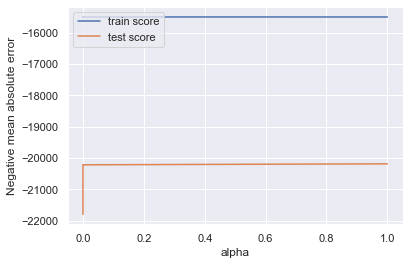

In [453]:
# Let us plot mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative mean absolute error')
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [454]:
#redge regression model coefficients
alpha = 2
rr_model = Ridge(alpha=alpha)

rr_model.fit(X_train, y_train)
rr_model.coef_

array([ -5172.02957294,  -3746.98543046,   6555.17669542,  13617.49854203,
         6457.02284496,   5308.07267229,  -1988.76797533,    621.65661613,
          934.42940446,   3911.7735177 ,  16175.509639  ,   -349.77617185,
        16226.68010986,   4403.43057053,    476.79217846,   7169.0828629 ,
         2875.40032932,  -2921.09791788,  -4020.38027289,   3634.95094056,
         1852.01566456,   4583.51317179,   1221.43979473,   -812.34846704,
         -235.77116999,   1264.72752357,   1494.17135707,   -523.34700872,
        12927.9704106 ,   3558.61139267,   5826.09378637,   1053.78914383,
         3797.50016829, -25567.68093486,   -281.86826263,  11627.42088978,
         2423.53700088,  10523.40422844,   7223.8006705 ,  -8305.24312286,
        -8605.61594776,  -2508.53537799,   3806.43101087, -20490.29163943,
        -2255.76480636,  -1722.38437598,  -1945.23528894,  -1634.26163918,
        -5175.10715261,  10713.08403761, -21908.73550466,  -8151.26491296,
       -14254.99359228,  

In [455]:
# ridge regression model parameters
rr_model_param = list(rr_model.coef_)
#rr_model_param.insert(0, ridge.intercept_)
rr_model_param = [round(x, 3) for x in rr_model_param]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, rr_model_param))

[('constant', -5172.03),
 ('MSSubClass', -3746.985),
 ('LotFrontage', 6555.177),
 ('LotArea', 13617.499),
 ('OverallQual', 6457.023),
 ('OverallCond', 5308.073),
 ('MasVnrArea', -1988.768),
 ('BsmtFinSF1', 621.657),
 ('BsmtFinSF2', 934.429),
 ('TotalBsmtSF', 3911.774),
 ('1stFlrSF', 16175.51),
 ('2ndFlrSF', -349.776),
 ('LowQualFinSF', 16226.68),
 ('GrLivArea', 4403.431),
 ('BsmtFullBath', 476.792),
 ('BsmtHalfBath', 7169.083),
 ('FullBath', 2875.4),
 ('HalfBath', -2921.098),
 ('BedroomAbvGr', -4020.38),
 ('KitchenAbvGr', 3634.951),
 ('TotRmsAbvGrd', 1852.016),
 ('Fireplaces', 4583.513),
 ('GarageArea', 1221.44),
 ('WoodDeckSF', -812.348),
 ('OpenPorchSF', -235.771),
 ('EnclosedPorch', 1264.728),
 ('3SsnPorch', 1494.171),
 ('ScreenPorch', -523.347),
 ('PoolArea', 12927.97),
 ('MSZoning_FV', 3558.611),
 ('MSZoning_RH', 5826.094),
 ('MSZoning_RL', 1053.789),
 ('MSZoning_RM', 3797.5),
 ('LotShape_IR2', -25567.681),
 ('LotShape_IR3', -281.868),
 ('LotShape_Reg', 11627.421),
 ('LandContour_

In [456]:
# fit ridge regression model
rr_lm = Ridge(alpha=2)
rr_lm.fit(X_train, y_train)

Ridge(alpha=2)

In [457]:
# predict now
y_train_pred = rr_lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = rr_lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9010039517347418
0.8353301810925959


In [468]:
model_parameters = list(rr_model.coef_)
model_parameters.insert(0,rr_model.intercept_)
model_parameters = [round(x,3) for x in model_parameters]
columns = X.columns
columns = columns.insert(0,"constant")
list(zip(columns,model_parameters))


[('constant', 166380.724),
 ('MSSubClass', -5172.03),
 ('LotFrontage', -3746.985),
 ('LotArea', 6555.177),
 ('OverallQual', 13617.499),
 ('OverallCond', 6457.023),
 ('MasVnrArea', 5308.073),
 ('BsmtFinSF1', -1988.768),
 ('BsmtFinSF2', 621.657),
 ('TotalBsmtSF', 934.429),
 ('1stFlrSF', 3911.774),
 ('2ndFlrSF', 16175.51),
 ('LowQualFinSF', -349.776),
 ('GrLivArea', 16226.68),
 ('BsmtFullBath', 4403.431),
 ('BsmtHalfBath', 476.792),
 ('FullBath', 7169.083),
 ('HalfBath', 2875.4),
 ('BedroomAbvGr', -2921.098),
 ('KitchenAbvGr', -4020.38),
 ('TotRmsAbvGrd', 3634.951),
 ('Fireplaces', 1852.016),
 ('GarageArea', 4583.513),
 ('WoodDeckSF', 1221.44),
 ('OpenPorchSF', -812.348),
 ('EnclosedPorch', -235.771),
 ('3SsnPorch', 1264.728),
 ('ScreenPorch', 1494.171),
 ('PoolArea', -523.347),
 ('MSZoning_FV', 12927.97),
 ('MSZoning_RH', 3558.611),
 ('MSZoning_RL', 5826.094),
 ('MSZoning_RM', 1053.789),
 ('LotShape_IR2', 3797.5),
 ('LotShape_IR3', -25567.681),
 ('LotShape_Reg', -281.868),
 ('LandContour

In [470]:
#create dataframe for ridge coefficients
ridge_coeff = list(zip(columns,model_parameters))
ridge_param = pd.DataFrame(ridge_coeff)
ridge_param.columns = ["Variable","Coefficients"]
results = ridge_param.sort_values(by=['Coefficients'],ascending=False)
results.head()


,Variable,Coefficients
0,constant,166380.724
59,Neighborhood_NoRidge,40550.234
113,Exterior2nd_ImStucc,32202.603
66,Neighborhood_StoneBr,30729.368
82,HouseStyle_1Story,20356.196


## Lasso regression model 
### Predict using Lasso regression model


In [440]:
# Applying Lasso regression model

# list of alphas to satisfy 
params = {'alpha': np.logspace(-2, 0.001, 100)}
 
lasso = Lasso()

# cross validation
foldsNo = 5
model_selection = GridSearchCV(estimator = lasso, 
                        param_grid = dict, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = foldsNo, 
                        return_train_score=True,
                        verbose = 1)            

model_selection.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [441]:
# cross validation results
cv_results = pd.DataFrame(model_selection.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.123534,0.021590,0.004200,0.002925,0.0001,{'alpha': 0.0001},-23957.727257,-20208.375130,-23119.459624,-24030.318462,...,-22963.123342,1416.275009,25,-15196.221117,-16419.200332,-15999.159946,-12717.228866,-15661.431664,-15198.648385,1304.007891
1,0.106133,0.008572,0.002800,0.000748,0.001,{'alpha': 0.001},-23960.524521,-20208.148766,-23119.266119,-24030.159732,...,-22963.405862,1416.667202,26,-15196.214056,-16419.173194,-15999.128481,-12717.225129,-15661.429738,-15198.634120,1304.000236
2,0.128539,0.041022,0.003203,0.000405,0.01,{'alpha': 0.01},-23988.500089,-20205.885401,-23117.304255,-24028.578507,...,-22966.627269,1420.795067,27,-15196.201904,-16418.946634,-15998.830607,-12717.205713,-15661.412698,-15198.519511,1303.927440
3,0.103842,0.004744,0.003201,0.000982,0.05,{'alpha': 0.05},-24066.643983,-20195.723922,-23108.591363,-24021.394883,...,-22972.200347,1433.352696,28,-15196.217053,-16418.072710,-15997.520696,-12717.153740,-15661.090128,-15198.010866,1303.599983
4,0.108324,0.005463,0.003004,0.000639,0.1,{'alpha': 0.1},-24055.143037,-20182.664960,-23096.348379,-24012.984179,...,-22958.114660,1433.456257,24,-15196.585699,-16417.079359,-15996.056076,-12717.155490,-15660.723796,-15197.520084,1303.207706


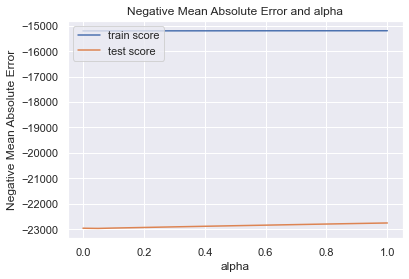

In [442]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [458]:
alpha = 0.08
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
lasso.coef_

array([-9.99050169e+02, -3.93795846e+03,  7.68375077e+03,  1.18450596e+04,
        6.28480138e+03,  5.32332809e+03, -1.96600908e+03,  1.75249714e+01,
       -2.43561621e+02,  1.36231539e+04,  2.85900667e+04,  1.71943454e+03,
        4.15189743e+03,  4.25752326e+03,  3.83959244e+02,  6.54179195e+03,
        2.52762444e+03, -2.56196596e+03, -3.95025502e+03,  3.48352286e+03,
        1.86524866e+03,  4.27588456e+03,  9.85958219e+02, -7.36198456e+02,
        1.29535485e+01,  1.50637307e+03,  1.65652536e+03, -9.11008384e+02,
        3.29275148e+04,  2.27375212e+04,  2.25976050e+04,  1.91696345e+04,
        1.70856552e+03, -3.22830722e+04,  5.68444890e+01,  1.21606479e+04,
        8.06329497e+02,  1.04877159e+04,  7.64145270e+03, -7.13255587e+03,
       -1.76574472e+04, -2.68715180e+03,  4.39702302e+03, -2.95781235e+04,
       -1.44592010e+04, -9.88754436e+03, -1.65763438e+04, -9.89964494e+03,
       -1.33836181e+04,  9.92183914e+02, -3.38782371e+04, -1.54241950e+04,
       -2.57917845e+04, -

In [459]:
#Lasso regression
lm = Lasso(alpha=0.08)
lm.fit(X_train, y_train)

Lasso(alpha=0.08)

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

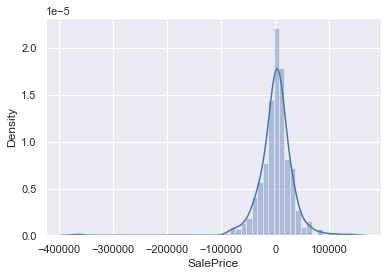

In [460]:
y_pred = lasso.predict(X_test)
residual = y_test - y_pred
sns.distplot(residual)

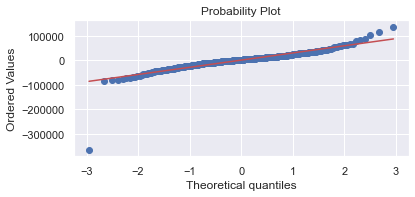

In [462]:
import scipy as sp
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)

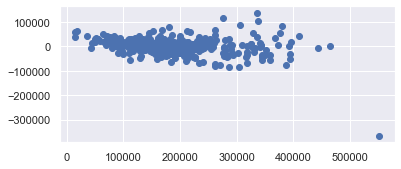

In [463]:
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(y_pred, residual)

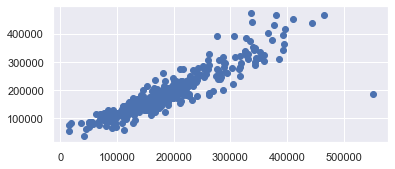

In [465]:
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(y_pred, y_test)

In [466]:
# prediction on the test set(Using R2)
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9038487101262623
0.8145793584952378


In [467]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 32740.427986176604
